In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('sales_data_sample.csv', encoding='latin1')

In [6]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [7]:
df.isna().sum()

,0
ORDERNUMBER,0
QUANTITYORDERED,0
PRICEEACH,0
ORDERLINENUMBER,0
SALES,0
ORDERDATE,0
STATUS,0
QTR_ID,0
MONTH_ID,0
YEAR_ID,0


In [51]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['POSTALCODE'] = le.fit_transform(df['POSTALCODE'])
df['COUNTRY'] = le.fit_transform(df['COUNTRY'])
df['DEALSIZE'] = le.fit_transform(df['DEALSIZE'])
df['STATUS'] = le.fit_transform(df['STATUS'])


In [52]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,5,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,0,18,NaN,Yu,Kwai,2
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,5,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,27,6,EMEA,Henriot,Paul,2
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,5,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,41,6,EMEA,Da Cunha,Daniel,1
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,5,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,49,18,NaN,Young,Julie,1
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,5,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,73,18,NaN,Brown,Julie,1


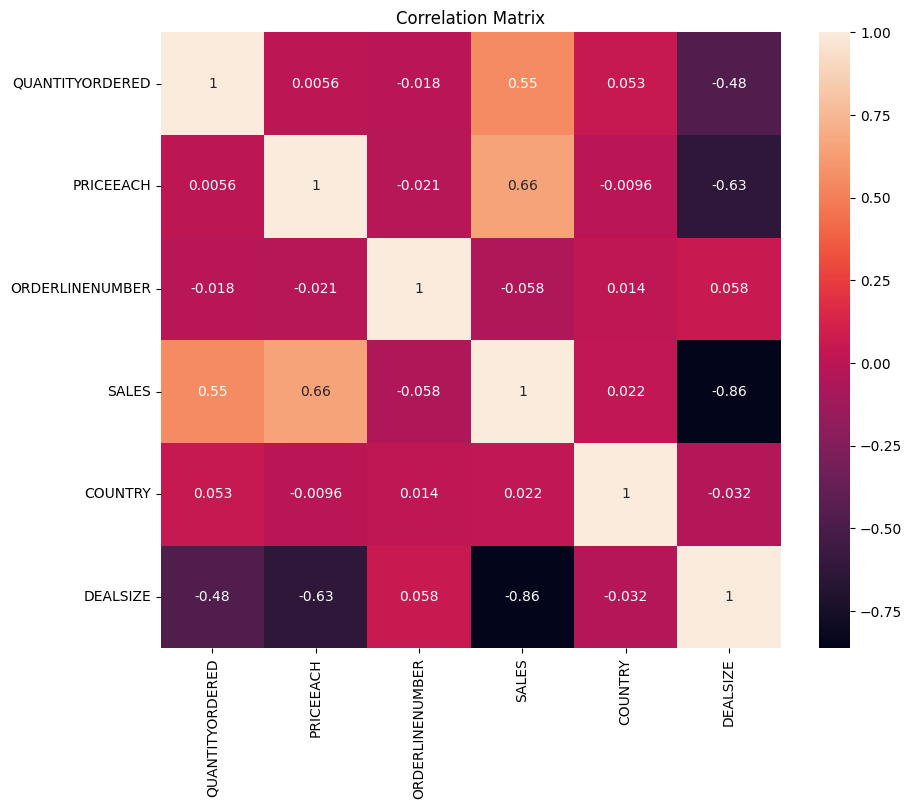

In [82]:
cols = ['QUANTITYORDERED','PRICEEACH','ORDERLINENUMBER','SALES','COUNTRY','DEALSIZE']
corr_mat = df[cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_mat, annot=True)
plt.title('Correlation Matrix')
plt.show()

In [71]:
#data = df[['COUNTRY','POSTALCODE','DEALSIZE']]
data = df[['STATUS','DEALSIZE']]

In [72]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data = sc.fit_transform(data)

In [73]:
from sklearn.cluster import KMeans
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k,init='k-means++', random_state=42)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

Text(0.5, 1.0, 'Elbow Method for Optimal k')

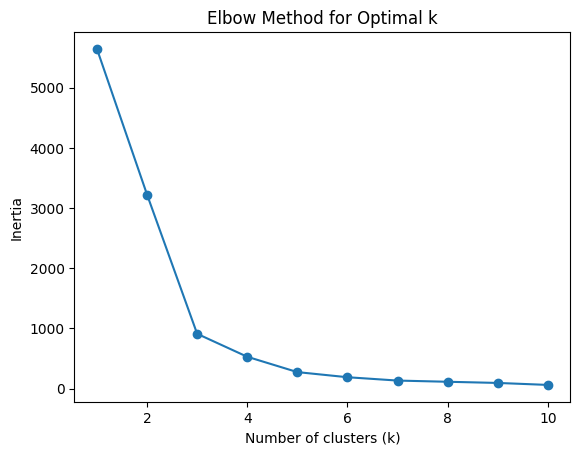

In [83]:
plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
# plt.show()

In [75]:
def find_optimal_k(inertias):
    differences = np.diff(inertias)
    second_differences = np.diff(differences)
    optimal_k = np.argmin(second_differences) + 2
    return optimal_k
optimal_k = find_optimal_k(inertias)
print(optimal_k)

9


In [76]:
from sklearn.metrics import silhouette_score
kmeans_optimal = KMeans(n_clusters=optimal_k,init = 'k-means++', random_state=42)
clusters = kmeans_optimal.fit_predict(data)
silhouette_avg = silhouette_score(data, clusters)
print(silhouette_avg)

0.963586716247545
